# Histogram

In [18]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 載入資料並刪除價格歷史為空的列
data = pd.read_csv('/Users/yuchingchen/Documents/專題/cleaned_data/long_flight_final.csv', low_memory=False)

# 移除包含 NaN 的數據
plot_data = data.dropna(subset=["平均價格_log", "最低價格_log", "最低價格天數", "價格變異_log", "中位數價格_log"])

# 僅選取艙等（主航段）為經濟艙的資料
plot_data = plot_data[plot_data["艙等（主航段）"] == "經濟艙"]

min_value = plot_data['最低價格'].min()
print("最低價格的最小值為：", min_value)

# 用布林索引過濾出「最低價格」等於最小值的所有列
rows_with_min_value = plot_data[plot_data['最低價格'] == min_value]

print(rows_with_min_value)
print("最低價格的最小值的數量為：", len(rows_with_min_value))

最低價格的最小值為： 32.0
             出發日期     出發時間  出發時段   星期 出發機場代號                  抵達時間  抵達時段  \
37408  2025-01-20  上午10:35  上午班機  星期一    TPE   下午5:00 (星期二, 1月 21)  下午抵達   
37420  2025-01-20   上午9:30  上午班機  星期一    TSA   下午5:00 (星期二, 1月 21)  下午抵達   
37430  2025-01-20   下午1:25  下午班機  星期一    TPE   下午5:00 (星期二, 1月 21)  下午抵達   
37432  2025-01-20   下午1:30  下午班機  星期一    TSA   晚上7:00 (星期二, 1月 21)  晚間抵達   
37433  2025-01-20   下午1:30  下午班機  星期一    TSA   清晨5:30 (星期二, 1月 21)  凌晨抵達   
...           ...      ...   ...  ...    ...                   ...   ...   
40285  2025-02-12  晚上11:25  晚間班機  星期三    TPE  中午12:05 (星期四, 2月 13)  下午抵達   
40292  2025-02-12  晚上11:25  晚間班機  星期三    TPE   晚上8:05 (星期四, 2月 13)  晚間抵達   
40304  2025-02-12  晚上11:40  晚間班機  星期三    TPE   清晨7:35 (星期五, 2月 14)  早晨抵達   
40305  2025-02-12  晚上11:40  晚間班機  星期三    TPE  中午12:45 (星期四, 2月 13)  下午抵達   
40306  2025-02-12  晚上11:40  晚間班機  星期三    TPE   晚上7:20 (星期四, 2月 13)  晚間抵達   

      抵達機場代號  機場客運量分類         航空公司  ...  筆數  平均價格_log  最低價格_log 價格變異_lo

**Histogram**

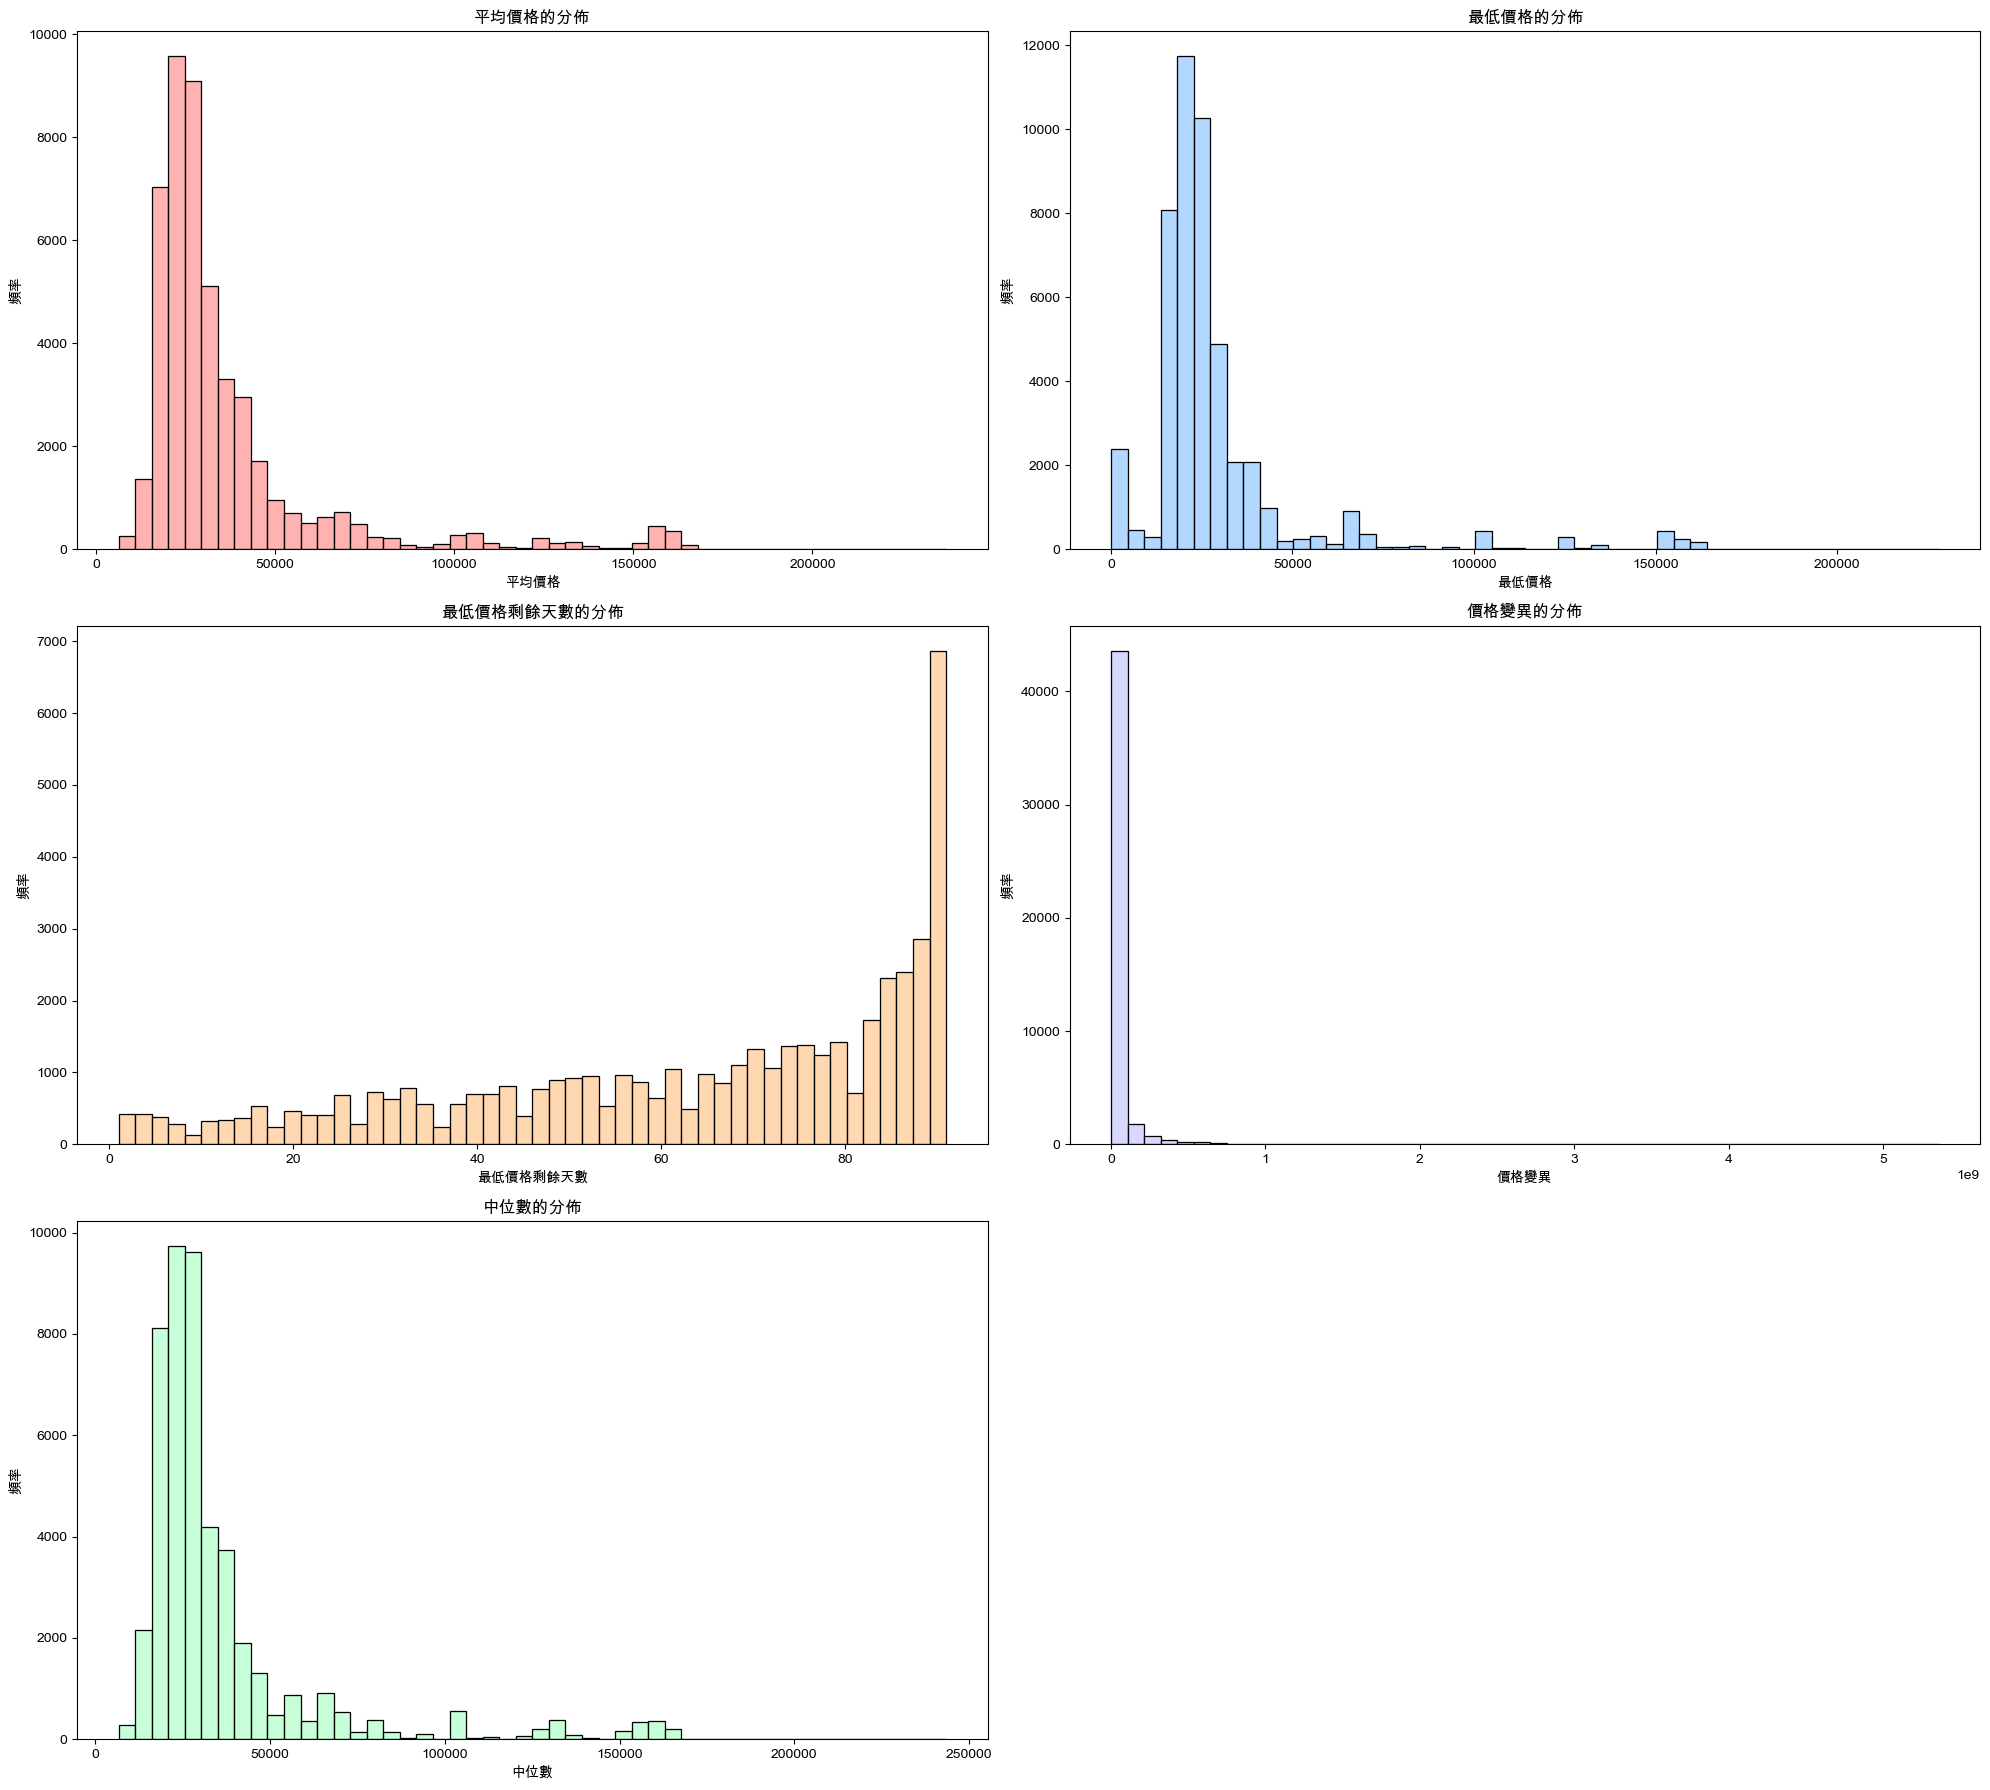

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建子圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
bins = 50  # 設定直方圖的 bin 數量

# 第一個子圖：平均價格的直方圖
sns.histplot(plot_data['平均價格'], bins=bins, kde=False, color='#FF9999', ax=axes[0, 0])
axes[0, 0].set_title('平均價格的分佈')
axes[0, 0].set_xlabel('平均價格')
axes[0, 0].set_ylabel('頻率')

# 第二個子圖：最低價格的直方圖
sns.histplot(plot_data['最低價格'], bins=bins, kde=False, color='#99CCFF', ax=axes[0, 1])
axes[0, 1].set_title('最低價格的分佈')
axes[0, 1].set_xlabel('最低價格')
axes[0, 1].set_ylabel('頻率')

# 第三個子圖：最低價格剩餘天數的直方圖
sns.histplot(plot_data['最低價格剩餘天數'], bins=bins, kde=False, color='#FFCC99', ax=axes[1, 0])
axes[1, 0].set_title('最低價格剩餘天數的分佈')
axes[1, 0].set_xlabel('最低價格剩餘天數')
axes[1, 0].set_ylabel('頻率')

# 第四個子圖：價格變異的直方圖
sns.histplot(plot_data['價格變異'], bins=bins, kde=False, color='#CCCCFF', ax=axes[1, 1])
axes[1, 1].set_title('價格變異的分佈')
axes[1, 1].set_xlabel('價格變異')
axes[1, 1].set_ylabel('頻率')

# 第五個子圖：中位數的直方圖
sns.histplot(plot_data['中位數價格'], bins=bins, kde=False, color='#B3FFCC', ax=axes[2, 0])
axes[2, 0].set_title('中位數的分佈')
axes[2, 0].set_xlabel('中位數')
axes[2, 0].set_ylabel('頻率')

# 隱藏第六個子圖（無數據）
axes[2, 1].axis('off')

# 調整佈局
plt.tight_layout()
plt.show()

**處理後：Histogram**

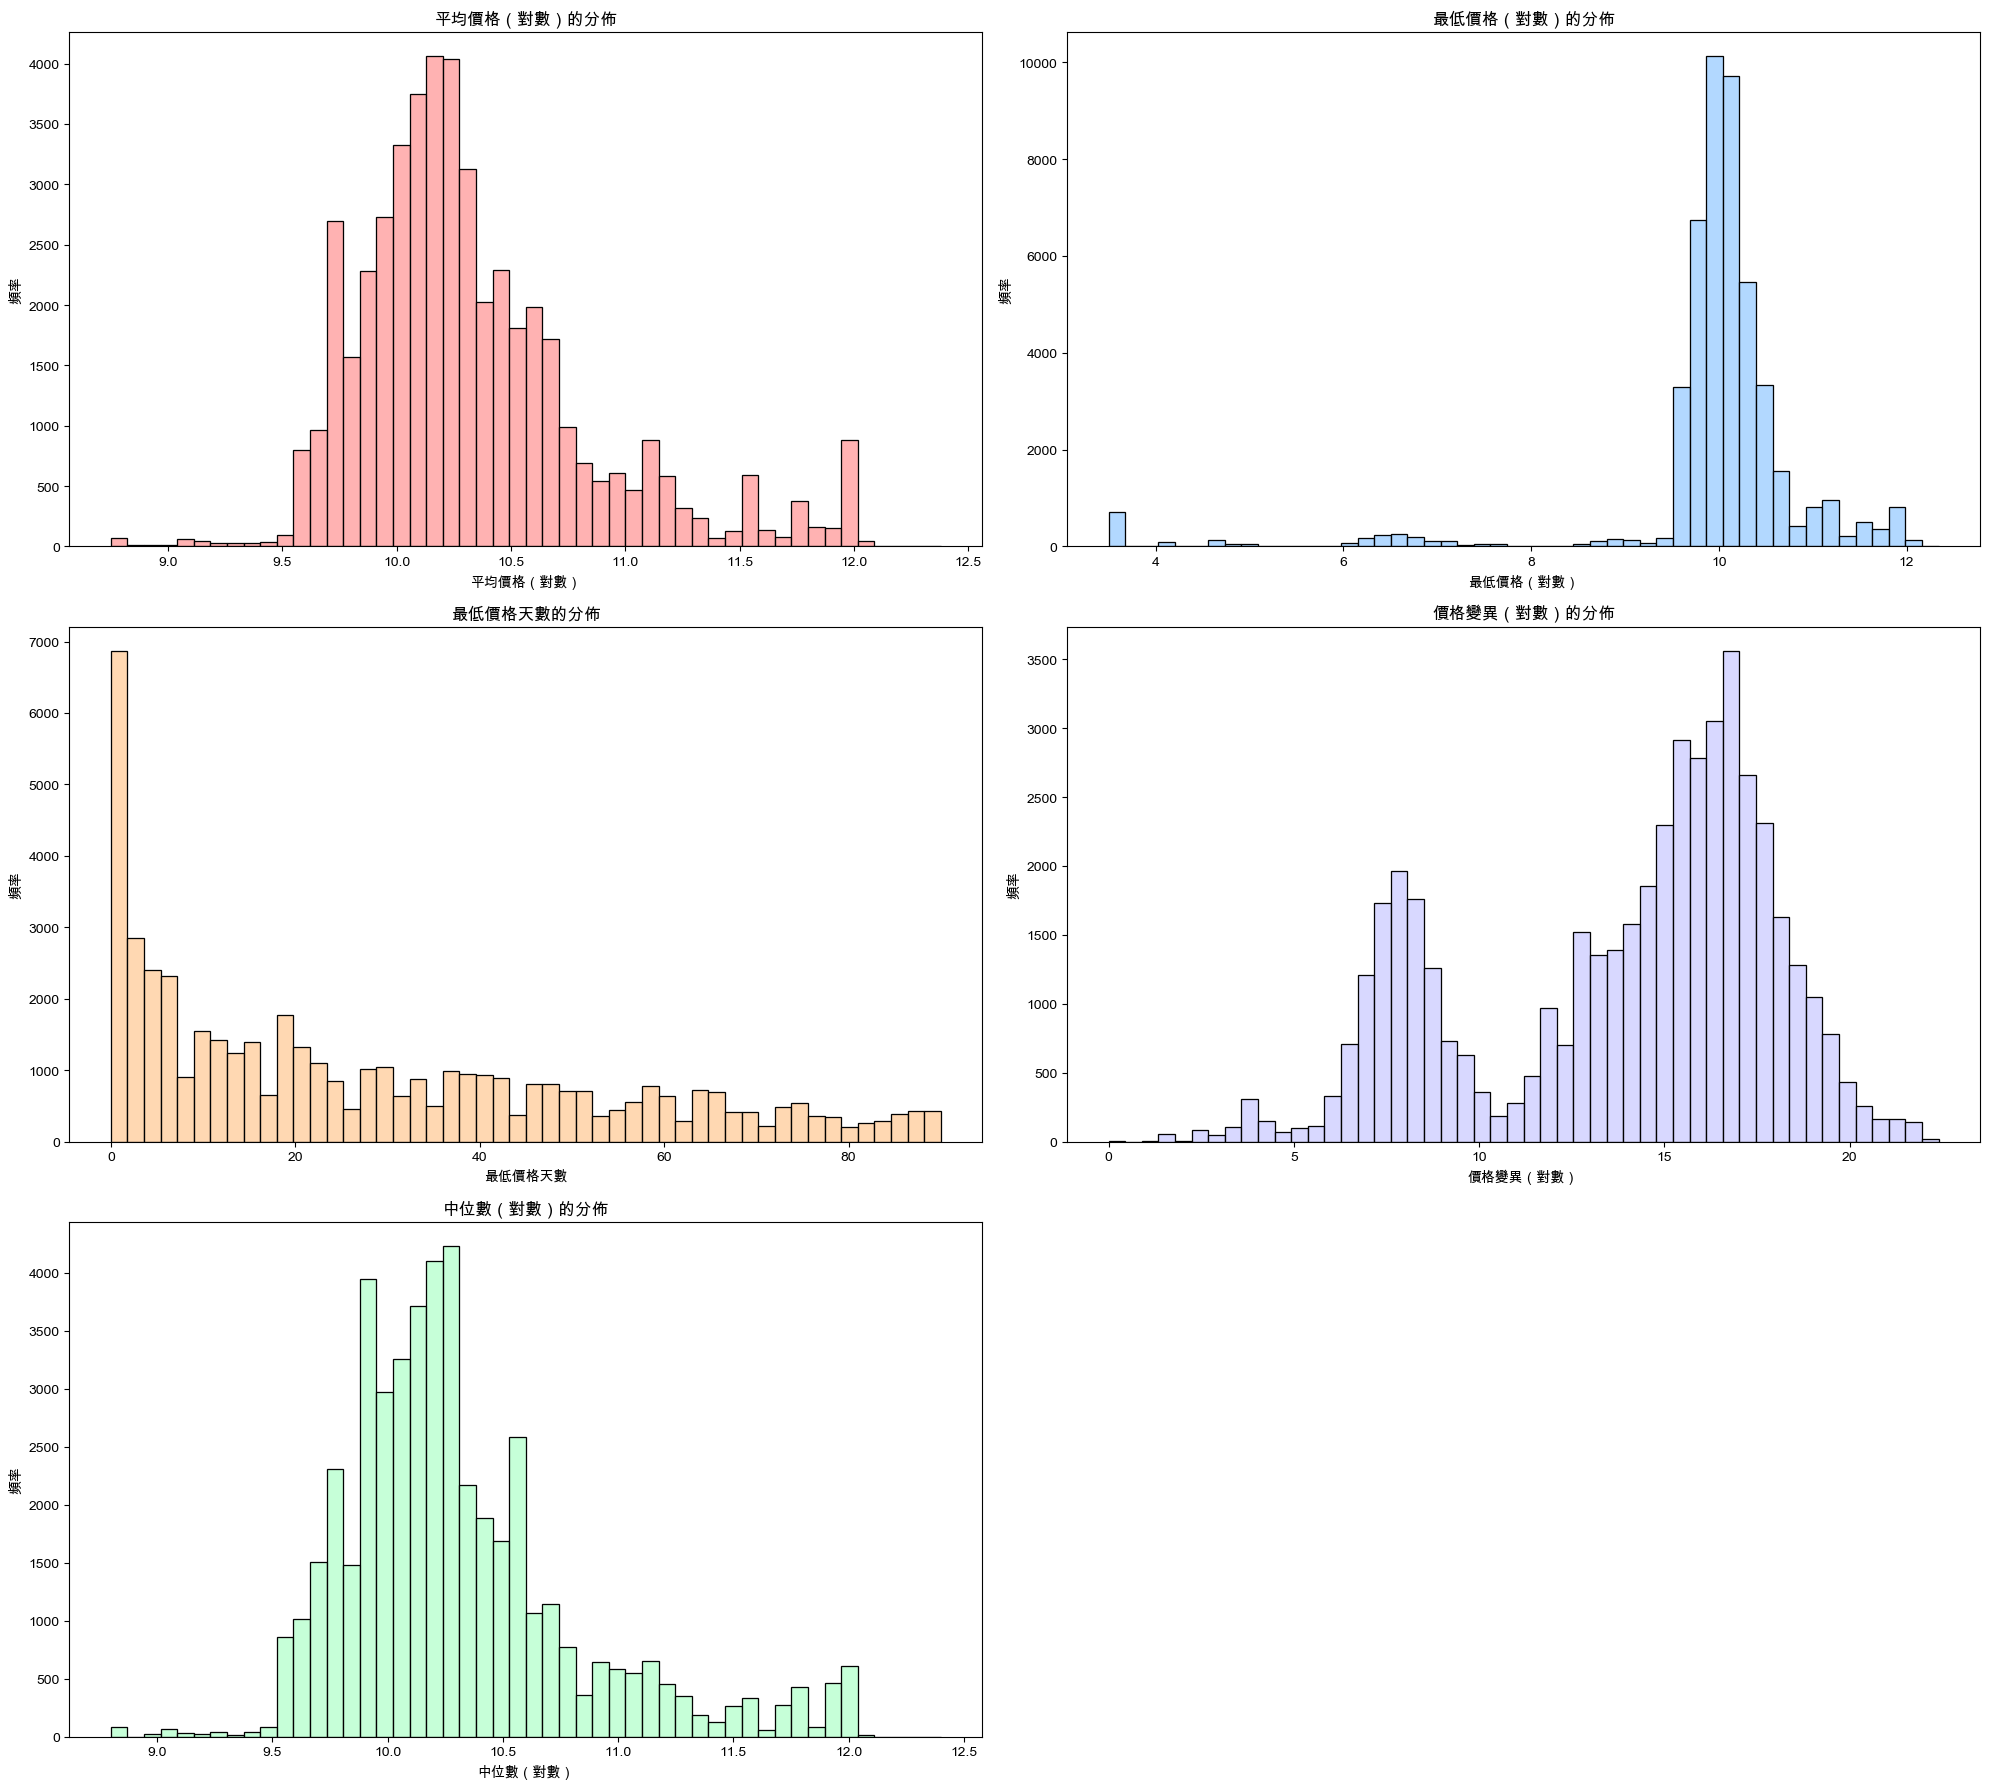

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建子圖，分別繪製平均價格（對數）、最低價格（對數）、最低價格剩餘天數（對數）、價格變異（對數）和中位數（對數）的直方圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
bins = 50  # 設定直方圖的 bin 數量

# 第一個子圖：平均價格（對數）的直方圖
sns.histplot(plot_data['平均價格_log'], bins=bins, kde=False, color='#FF9999', ax=axes[0, 0])
axes[0, 0].set_title('平均價格（對數）的分佈')
axes[0, 0].set_xlabel('平均價格（對數）')
axes[0, 0].set_ylabel('頻率')

# 第二個子圖：最低價格（對數）的直方圖
sns.histplot(plot_data['最低價格_log'], bins=bins, kde=False, color='#99CCFF', ax=axes[0, 1])
axes[0, 1].set_title('最低價格（對數）的分佈')
axes[0, 1].set_xlabel('最低價格（對數）')
axes[0, 1].set_ylabel('頻率')

# 第三個子圖：最低價格天數的直方圖
sns.histplot(plot_data['最低價格天數'], bins=bins, kde=False, color='#FFCC99', ax=axes[1, 0])
axes[1, 0].set_title('最低價格天數的分佈')
axes[1, 0].set_xlabel('最低價格天數')
axes[1, 0].set_ylabel('頻率')

# 第四個子圖：價格變異（對數）的直方圖
sns.histplot(plot_data['價格變異_log'], bins=bins, kde=False, color='#CCCCFF', ax=axes[1, 1])
axes[1, 1].set_title('價格變異（對數）的分佈')
axes[1, 1].set_xlabel('價格變異（對數）')
axes[1, 1].set_ylabel('頻率')

# 第五個子圖：中位數（對數）的直方圖
sns.histplot(plot_data['中位數價格_log'], bins=bins, kde=False, color='#B3FFCC', ax=axes[2, 0])
axes[2, 0].set_title('中位數（對數）的分佈')
axes[2, 0].set_xlabel('中位數（對數）')
axes[2, 0].set_ylabel('頻率')

# 隱藏第六個子圖（無數據）
axes[2, 1].axis('off')

# 調整佈局
plt.tight_layout()
plt.show()